# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [3]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer

In [4]:
sns.set()

### Setup objective function

In [5]:
def schaffer_function(x):
    f1 = -x * (x <= 1) + (x - 2) * (1 < x <= 3) + (4 - x) * (3 < x <= 4) + (x - 4) * (x > 4)
    return [f1, (x - 5)**2]

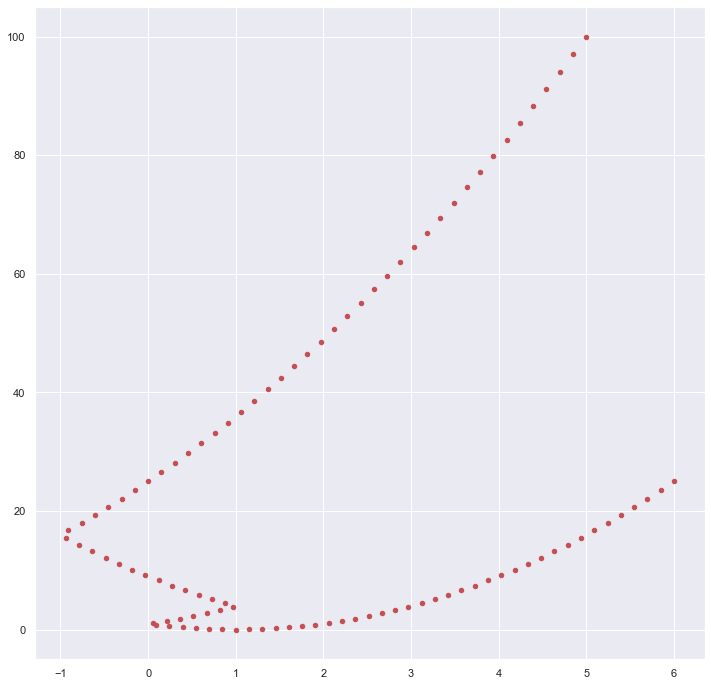

In [6]:
plt.figure(figsize=[12, 12])

x = np.linspace(-5, 10, 100).reshape(-1, 1)
values = np.apply_along_axis(schaffer_function, 1, x)
plt.scatter(values[:, 0], values[:, 1], c="r", s=20)

In [12]:
optimzier = SPEAOptimizer(
    schaffer_function,
    n_dim=1,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="mean_shift"
)

In [14]:
history = optimzier.optimize(
    generations=100,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.4,
    reducing_period=1,
    search_range=((-5, 10),),
    mutation_strength=1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    mutation_schedule="increasing_linear",
    crossover_schedule="const",
    strength_schedule=lambda generation, factor, n_generations: 1 * (generation < 80) + 10 * (generation > 80),
    logging=True,
    logging_path="../data/schaffer_logs_2.csv"
)

100%|██████████| 100/100 [00:33<00:00,  3.97it/s]


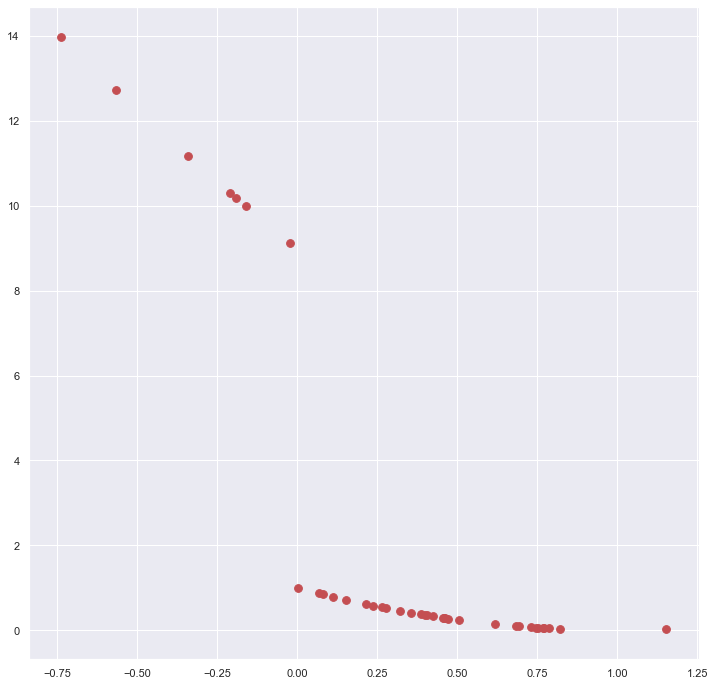

In [16]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(schaffer_function, 1, optimzier.pareto_front)
plt.scatter(values[:, 0], values[:, 1], c="r", s=60)